# How to avoid overfitting of DNNs using regularization techniques.

- Neural networks are known to be universal approximators of continuous functions and it is not surprising that in order to approximate a complex function, NNs sometimes needs very large number of parameters( some times even millions). 
- This higher number of parameters lead to a risk of overfitting the data, which inturn results in worse predictions on a new test set which was not used in training.

## $l_1$ and $l_2$ regularization 

- This is the equivalent of lasso and ridge regression from the study of linear regeression models.


### Implementing in Keras:

In [4]:
import tensorflow as tf
from tensorflow import keras

#l_1 regularization of weights
layer_l1_reg = keras.layers.Dense(100, activation="elu", 
                                  kernel_initializer="he_normal",
                                 kernel_regularizer=keras.regularizers.l1(0.01))

#l_2 regularizatino of weights
layer_l2_reg = keras.layers.Dense(100, activation="elu", 
                                  kernel_initializer="he_normal",
                                 kernel_regularizer=keras.regularizers.l2(0.01))
#l_1 and l_2 regularizatino of weights at the same time
layer_l1_l2_reg = keras.layers.Dense(100, activation="elu", 
                                  kernel_initializer="he_normal",
                                 kernel_regularizer=keras.regularizers.l1_l2(0.01))

#### How to apply same regularization to all layers in the network instead of copy pasting keran_regularizer = keras.regularizers.l1() to all layer definitions ?

Use Python’s functools.partial() function, which lets you create a thin wrapper for any callable, with some default argument values:

In [5]:
from functools import partial

RegularizedDense = partial(keras.layers.Dense,
                           activation="elu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=keras.regularizers.l2(0.01))

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    RegularizedDense(300),
    RegularizedDense(100),
    RegularizedDense(10, activation="softmax",
                     kernel_initializer="glorot_uniform")
])

## Dropout

__Regularization by random dropout of weights during some trainng instances.__

- This is one of the most popular techniques for regularization of DNNs.
- At every training step, every neuron (including the input neurons, but always excluding the output neurons) has a probability p of being temporarily “dropped out,” meaning it will be entirely ignored during this training step, but it may be active during the next step.
- The hyperparameter p: dropout rate, and it is typically set between 10% and 50%: closer to 20–30% in recurrent neural nets (see Chapter 15), and closer to 40–50% in convolutional neural networks (see Chapter 14).
- After training, neurons don’t get dropped anymore.
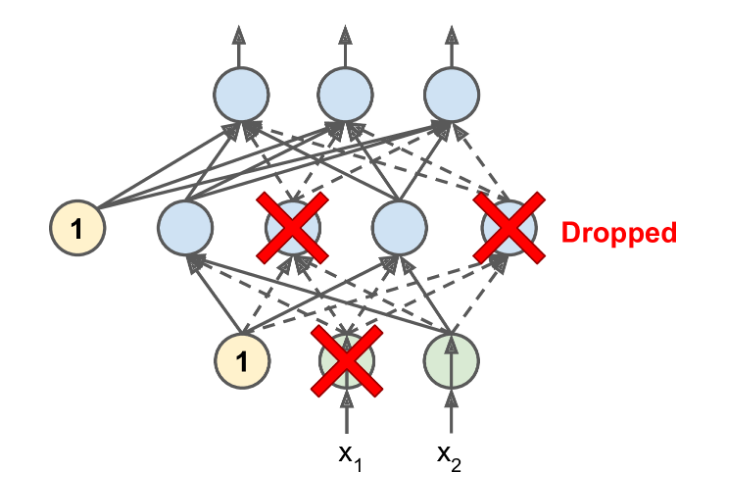

- Dropping the neurons randomly on each iteration brings down the dependence of neuron on the neighbouring neurons and hence the drop of one single neuron from the network wont have a huge change to others at the end.
- In practice, we apply dropout to only to top three layers excluding the output layer.

### Impelmentaion in Keras

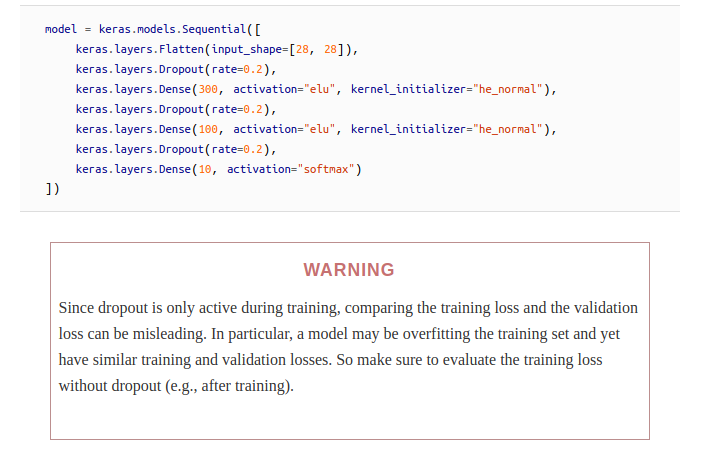

- If you want to regularize a self-normalizing network based on the __SELU activation function__ (as discussed earlier), you should use alpha dropout: this is a variant of dropout that preserves the mean and standard deviation of its inputs (it was introduced in the same paper as SELU, as regular dropout would break self-normalization).

## Monte Carlo(MC Dropout)

- It helps with quantifying the uncertainly of predictions after training using the dropouts.

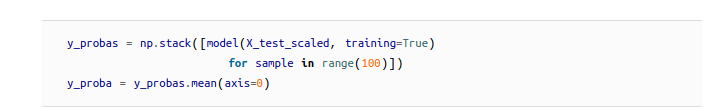

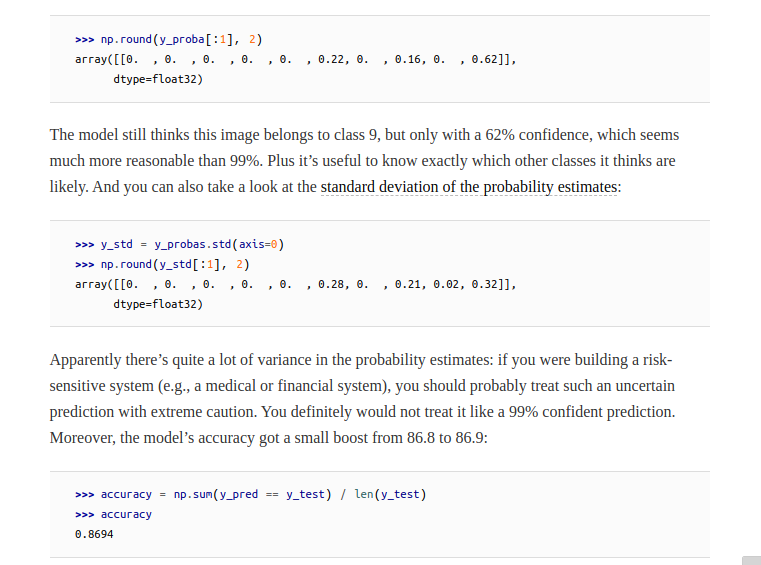

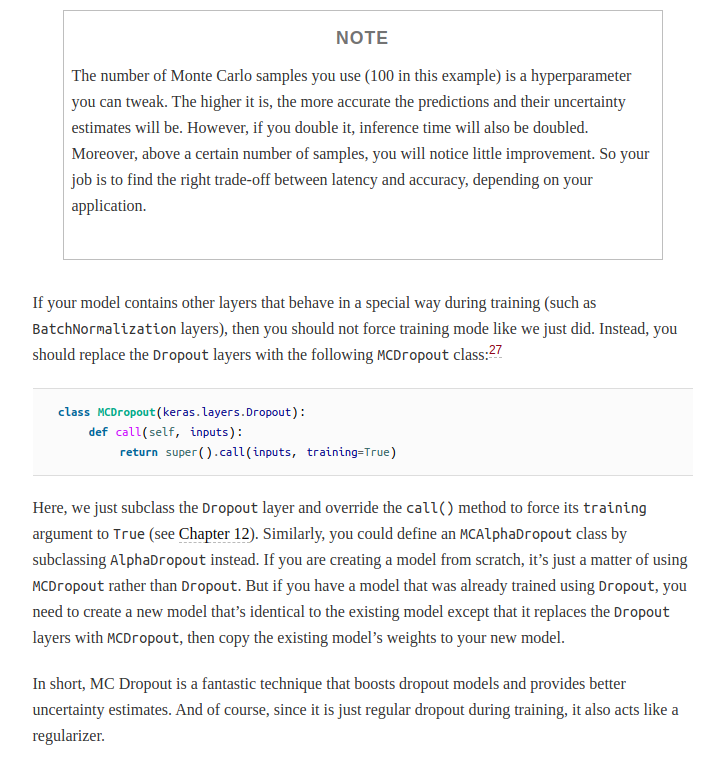

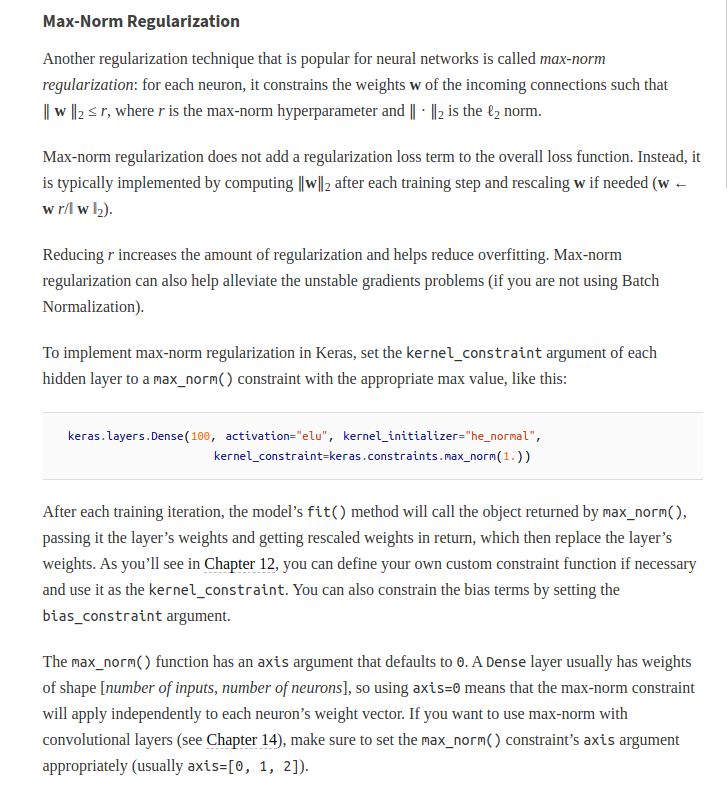